## SKLearn实现随机森林算法

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
from collections import Counter
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy:.2f}")
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

模型准确率: 1.00

分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



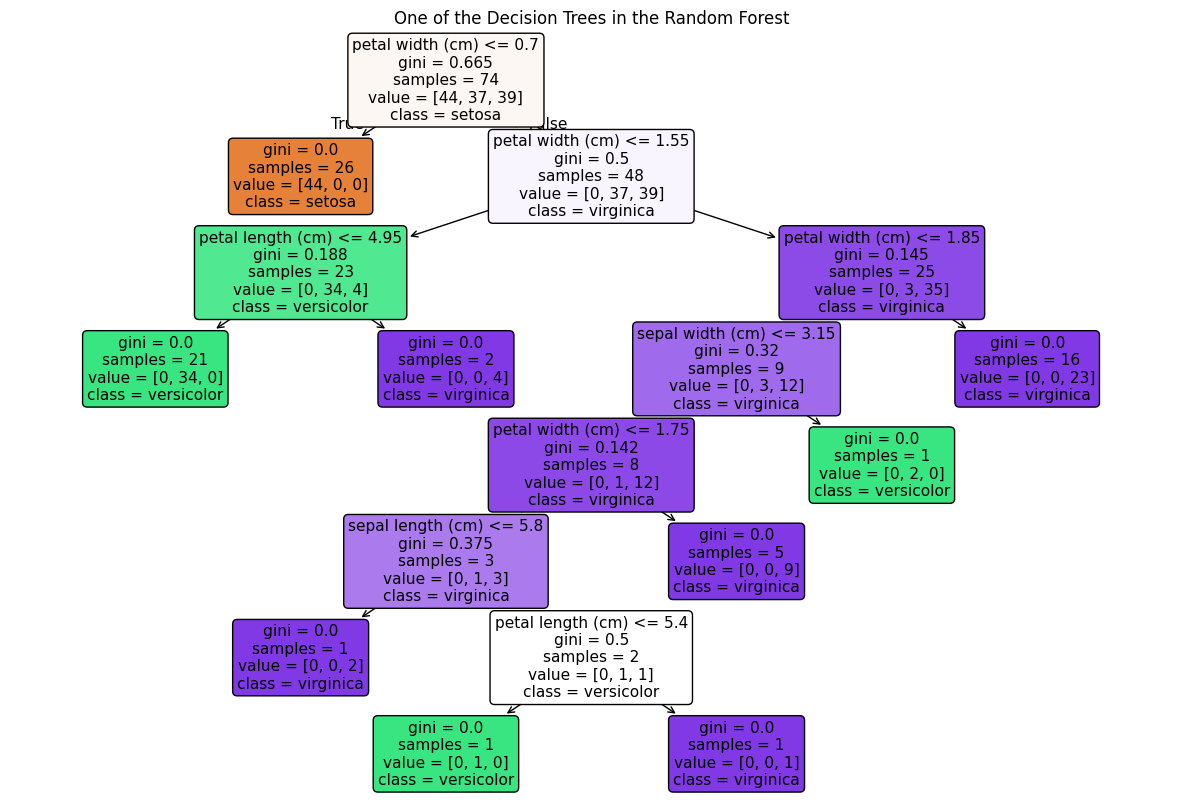

In [3]:
plt.figure(figsize=(15, 10))
tree = clf.estimators_[0]  # 选择第一个决策树
plot_tree(tree, feature_names=data.feature_names,
          class_names=data.target_names, filled=True, rounded=True)
plt.title("One of the Decision Trees in the Random Forest")
plt.show()

## 手动实现随机森林算法

定义参数

In [4]:
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
n_estimators = 10  # 决策树的数量
max_depth = None  # 树的最大深度
min_samples_split = 2  # 节点分裂的最小样本数
n_samples, n_features = X.shape
max_features = int(np.sqrt(n_features))  # 选择特征的数量
trees = []  # 保存所有的决策树

训练模型

In [6]:
for _ in range(n_estimators):
    # Bootstrap sampling
    indices = np.random.choice(n_samples, n_samples, replace=True)
    X_sample = X[indices]
    y_sample = y[indices]
    # Random feature selection
    feature_indices = np.random.choice(
        n_features, max_features, replace=False)
    # Train a decision tree
    tree = DecisionTreeClassifier(
        max_depth=max_depth, min_samples_split=min_samples_split)
    tree.fit(X_sample, y_sample)
    trees.append(tree)

测试模型

In [7]:
tree_preds = np.array([tree.predict(X_test) for tree in trees])
# Majority vote
y_pred = np.apply_along_axis(
    lambda x: Counter(x).most_common(1)[0][0],
    axis=0,
    arr=tree_preds)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [8]:
print("模型准确率:", accuracy_score(y_test, y_pred))

模型准确率: 1.0
